OK !! enough of break, let's get back to work.

# HYPOTHESIS TESTING

* What is Hypothesis Testing ?
* Answer:  Evaluates two Exclusive statement on a 'Population' data using 'Sample data'.

* Population: Entire group that you want to draw conclusion about.
* Sample: A specific group that you need to analyse about, for Population estimates.

* Two statements are - Null hypothesis(H0) and Alternate hypothesis(H1).

* P-value: It is the probablity for the 'Null hypothesis' to be true.

* There are three regions in our "p-value normal distributed curve" or "bell curve"

* 95% - Confidence Interval
* 5 % - Extreme Interval (5 % being divided into two parts of 2.5 % on either sideways of the bell curve).

* And that 5 % is also called the "Significance level(alpha)" which is 0.05 in actual numbers.
* alpha=0.05

* If p-value <= 0.05  (i.e in the extreme interval)   (less than or equal to) ----> Reject the Null Hypothesis.

* p- value  > 0.05 ----> In the confidence interval -----> Accept the Null Hypothesis.

* Types of Hypothesis Tests:

   1. Normality Test(Test to know if the data is normally distributed or not)
    
   2. Correlation Tests(Person and Spearman test to know if any two features are correlated ro not)
    
   3. Other Tests:
   
        1. Parametric(T-test)
        2. Non-parametric(Chi-square test)
        3. stationarity test(Time series test)

In [2]:
#code

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=load_boston()
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
bos=pd.DataFrame(df.data,columns=df.feature_names)

In [6]:
bos['Price']=df.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.preprocessing import StandardScaler           ##bringing RM column in a specific scale
scaler=StandardScaler()
new_RM=scaler.fit_transform(bos[['RM']])
#new_RM

In [9]:
bos['RM']=new_RM                                            #replacing the unscaled RM column to the scaled RM

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,0.413672,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,0.194274,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,1.282714,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,1.016303,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,1.228577,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.shape

(506, 14)

# Normality Test

* In statistics, Normality tests are used to check if the data is drawn from a Guassian distribution('Normal Distribution').
* Simply: Weather your data is Normally distributed or not

* In MACHINE LEARNING, data satisfying normal distribution is beneficial for model buiding. It makes mathematics easier.

* Models like:
    * LDA
    * Gaussian Naive bayes
    * Logistic regression
    * Linear Regression
 * are explicitly calculated from the assumption that the distribution is "normally distributed".

* There are basically two methods to find wether your data is normally distributed:
    1. GRAPHICAL METHOD
    2. Statistical Tests

1. GRAPHICAL METHOD

* HISTOGRAMS
* As we know the normal distribution is symmetric and bell shaped. A simple method to test the normality is to observe the distribution of the sample data by the histogram.

Text(0.5, 0.98, 'Histograms of all the features')

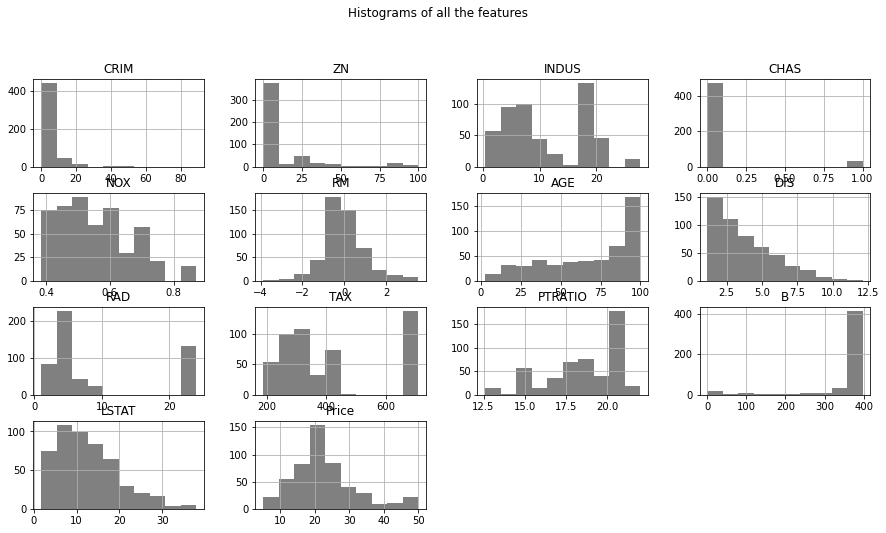

In [12]:
bos.hist(layout=(5,4),color='grey',figsize=(15,10),grid=True)
plt.suptitle("Histograms of all the features")

* BOXPLOT
* In the boxplot, there is graphically depiction of groups of the numeric data through their quartiles. Boxplot is not only used in detecting outliers, but also to see and understand the distribution. In this all the variables are looking skewed as distance of both whiskers are not equal and hence not normally distributed.

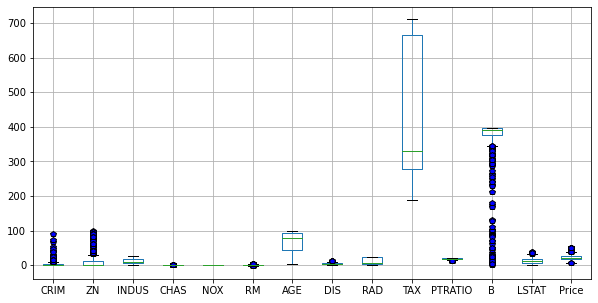

In [13]:
bit=dict(markerfacecolor='b',marker='p')    #to define the outliers

boxplot=bos.boxplot(figsize=(10,5),grid=True,flierprops=bit)

* Whiskers need to be at equal distance from each side to be called as normally distributed.

WE also have two more graphical methods 
* Kdeplot- Kernel distribution estimation plot(probablity density function)
* QQplot- When qauntiles of two variables are plotted against each other.

QQplot

* Understand QQ-plot

In [14]:
#QQplot for some data we already know is normally distributed


import numpy as np
# Generate some normally distributed random numbers
random_normals = [np.random.normal() for i in range(1000)]

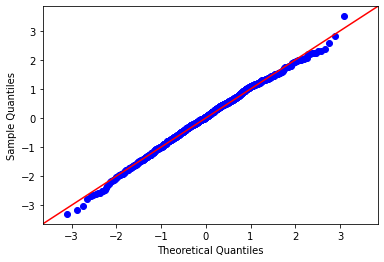

In [15]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
# Create QQ plot
sm.qqplot(np.array(random_normals), line='45')
plt.show()

See how our data (the blue dots) fall pretty cleanly on the red line? That means that our data is normally distributed (which we already knew). And that’s it. If our data adheres to the red 45 degree line, it’s normal or close to it, and if it does not, then it’s not normal.

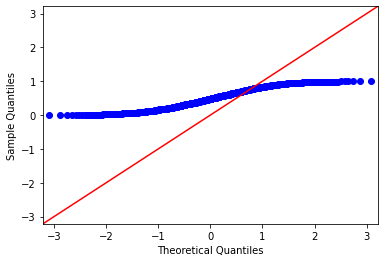

In [16]:
#QQ plot for something that's not normal

import random
# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]
# Create QQ plot
sm.qqplot(np.array(random_uniform), line='45')
plt.show()

Our data (the blue dots) is nowhere close to the red line, meaning it’s not normally distributed (it’s uniformly distributed). So now that we understand what QQ plots do, let’s figure out how they do it.

NOW, here in our dataset

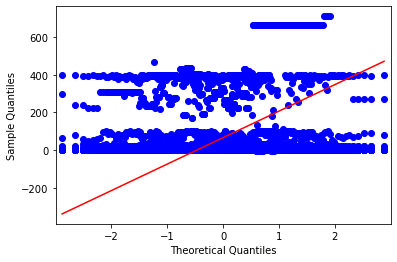

In [17]:
from statsmodels.graphics.gofplots import qqplot

qqplot(bos, line='s')    #line is inclined to 45 degree
plt.show()

door door tak normally distributed nai hain.

# 2. Statistical Tests

Shapiro-Wilk TEST- Test to see if data is Normally distributed

* Null Hypothesis- Data is normally distributed
* Alternate Hyposthesis- Data is not normally distributed

In [18]:

from scipy.stats import shapiro

shapiro_stat,pvalue=shapiro(bos)

print(shapiro_stat)
print(pvalue)

0.5198569893836975
0.0


C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* There might be a glich in the dataset, that's why p value has came zero.

In [19]:
#Shapiro test on an individual feature
#Price column

from scipy.stats import shapiro         #import

data_1=bos['Price']                      #Column on which test has to occur

stat,p=shapiro(data_1)                    #stat is the mathematical value calculated on paper using formula.

print('stat=%.2f, p=%.30f' %(stat,p))

if p> 0.05:
    print('Accept the null hypothesis, you are in the confidence interval, data is Normally distributed')
else:
    print('Reject the Null hypothesis, p value is less than 0.05--> EXtreme Interval, data is Not normally distributed')

stat=0.92, p=0.000000000000000494061824397461
Reject the Null hypothesis, p value is less than 0.05--> EXtreme Interval, data is Not normally distributed


* Visualize the Price column and we can see it doesn't follow the bell curve

<AxesSubplot:ylabel='Frequency'>

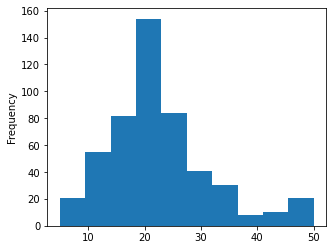

In [20]:
bos['Price'].plot.hist(figsize=(5,4))

* We can also generate some random numbers and apply this test to see whether it is normally distributed or not.

In [21]:
#randomly generating some numbers
from numpy.random import randn
data_to=randn(100)

In [22]:
#data_to

In [23]:
from scipy.stats import shapiro

stat,p=shapiro(data_to)

print('stat=%.2f, p=%.30f' %(stat,p))

if p> 0.05:
    print('Accept the null hypothesis, you are in the confidence interval, data is Normally distributed')
else:
    print('Reject the Null hypothesis, p value is less than 0.05--> EXtreme Interval, data is Not normally distributed')

stat=0.99, p=0.353177696466445922851562500000
Accept the null hypothesis, you are in the confidence interval, data is Normally distributed


(array([ 5.,  6., 17., 16., 24., 17., 11.,  2.,  0.,  2.]),
 array([-2.12473978e+00, -1.59431361e+00, -1.06388743e+00, -5.33461262e-01,
        -3.03508872e-03,  5.27391084e-01,  1.05781726e+00,  1.58824343e+00,
         2.11866960e+00,  2.64909578e+00,  3.17952195e+00]),
 <BarContainer object of 10 artists>)

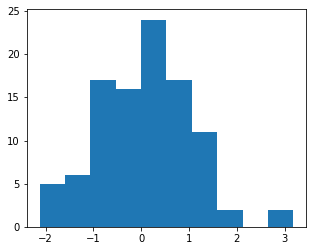

In [24]:
plt.figure(figsize=(5,4))
plt.hist(data_to)

* K^2 Normality test

In [25]:
from scipy.stats import normaltest
data_to=bos['Price']

stat,p=normaltest(data_to)

print('stat=%.2f, p=%.30f' %(stat,p))

if p> 0.05:
    print('Normally distributed')
else:
    print('Not normally distributed')

stat=90.97, p=0.000000000000000000017583188872
Not normally distributed


# Correlation Test:

* "In statistical terms, we use correlation to denote association between two quantitative variables".

* Positive correlation- When one variable increases, other varible also increases
* Negative correlation- When one variable increases, other variable decreases
* Neutral Correlation: No relationship in the change of the variables.

* Q. Why we use correlation test ?
  * ANS: "To remove Multicollinearity"-The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated (or causing problems) variables should be removed in order to improve the skill of the model.
  * "FEATURE SELCTION"- We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

* Correlation Tests:
   1. Covariance
   2. Pearson correlation test
   3. Speraman rank correlation test

# 1. Covariance

* Covariance:
    * Before understanding covariance, lets understand "Variance":
        * Variance: measure of how much a value in the distribution(normal distribution) vary with respect to mean. More closer the value to the mean, lower your variance. Higher your distance from the mean, higher the variance.
        * In simple words, "Variance is the variation of only one variable wrt mean".
    * And Covariance is the variation of two variables with each other(Linear Relationship)
    * The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). A covariance value of zero indicates that both variables are completely independent.
    * The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.
    * covariance= cov(data1,data2)    
    * The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables; in this case, the remaining two values are the same given that we are calculating the covariance for only two variables:
        * The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the "relationships" between two or more variables.
        * Covarince just shows the "direction of relationship" bw two variables.

Difference bw Covariance and Covariance:

       * Covariance is nothing but a measure of correlation. Correlation refers to the scaled form of covariance. Covariance indicates the direction of the linear relationship between variables. Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.

      

In [36]:
from numpy import cov                   #import cov method from numpy
covarince=cov(bos['CRIM'],bos['RM'])     #covariance bw two varibles
covarince

array([[73.9865782 , -1.88772667],
       [-1.88772667,  1.0019802 ]])

* The covariance between the two variables is -1.88772667 . We can see that the relationship bw this two varibles is negative, suggesting the variables change in the opposite direction as we expect.

# 2. Pearson Correlation

* The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

* Where covariance just shows the direction of relationship (+ve or -ve), Pearson correlation coefficient actually tell you the strength of the realtionship bw two variables.

* The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.
      * pearson correlation coefficient= Covariance(x,y) / (std(x)* std(y))
      * The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution -Limitation of PCC(Both the varibles need to be normally distributed)

PCC value lies in [-1 to +1]
* 0.9-1 Positive or Negative, indicates a Strong correlation
* 0.7-0.9 Strong correlation
* 0.5-0.7 Moderate correlation
* 0.3-0.5 Weak correlation
* 0-0.3 Negligieble correlation

In [44]:
#corr() function to calculate the correlation coefficients

pcc=bos.corr()   #bydefault you will get all pearson coefficients but you can mention the 'method'
pcc.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445


In [43]:
#we can change the method also
spcc=bos.corr(method='spearman')
spcc.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00000,-0.57166,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.57166,1.00000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179


In [46]:
#for specific two columns
corr_two=bos['CRIM'].corr(bos['AGE'])
corr_two    #here also by default we will get pearson value

0.3527342509013639

In [48]:
#we can also find pcc like:
from scipy.stats import pearsonr   
pearsonr(bos['CRIM'],bos['AGE'])   

#(Pearson coefficient, p-value)

(0.35273425090136384, 2.8548693502435173e-16)

In [64]:
#HYPOTHESIS TESTING WITH PCC:

#TWO VARIBLES- 'CRIM' AND 'AGE'

#NULL HYPOTHESIS- independent varibles

#ALTERNATIVE HYPOTHESIS- dependent varibles

pcc,p_value=pearsonr(bos['CRIM'],bos['AGE'])

print(pcc)
print(p_value)

if p_value>0.05:    #Ho is true
    print("Independent varibles")
else:
    print("Dependent varibles")

print('Since we got p_value very very less than 0.05, we rejected the null hypothesis')

print('Offcourse, there is a correlation bw them and its positive but the intensity is very weak i.e. just 35% association')

0.35273425090136384
2.8548693502435173e-16
Dependent varibles
Since we got p_value very very less than 0.05, we rejected the null hypothesis
Offcourse, there is a correlation bw them and its positive but the intensity is very weak i.e. just 35% association


In [51]:
#Colorful Visualiztion of the correlation
bos.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.0,-0.2005,0.4066,-0.05589,0.421,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0,-0.5338,-0.0427,-0.5166,0.312,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.413,0.3604
INDUS,0.4066,-0.5338,1.0,0.06294,0.7637,-0.3917,0.6448,-0.708,0.5951,0.7208,0.3832,-0.357,0.6038,-0.4837
CHAS,-0.05589,-0.0427,0.06294,1.0,0.0912,0.09125,0.08652,-0.09918,-0.007368,-0.03559,-0.1215,0.04879,-0.05393,0.1753
NOX,0.421,-0.5166,0.7637,0.0912,1.0,-0.3022,0.7315,-0.7692,0.6114,0.668,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.312,-0.3917,0.09125,-0.3022,1.0,-0.2403,0.2052,-0.2098,-0.292,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.08652,0.7315,-0.2403,1.0,-0.7479,0.456,0.5065,0.2615,-0.2735,0.6023,-0.377
DIS,-0.3797,0.6644,-0.708,-0.09918,-0.7692,0.2052,-0.7479,1.0,-0.4946,-0.5344,-0.2325,0.2915,-0.497,0.2499
RAD,0.6255,-0.3119,0.5951,-0.007368,0.6114,-0.2098,0.456,-0.4946,1.0,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.03559,0.668,-0.292,0.5065,-0.5344,0.9102,1.0,0.4609,-0.4418,0.544,-0.4685


* Assumption- There is no correlation bw two samples i.e Independnet samples
* H0= Varibles are independent

In [26]:
corr_table=bos[1:10].corr(method='spearman')
corr_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,0.866025,0.668153,NaN,0.668153,-0.816667,0.616667,0.706543,0.935414,0.668153,-0.668153,-0.288177,0.816667,-0.600000
ZN,0.866025,1.000000,0.925820,NaN,0.925820,-0.866025,0.779423,0.353861,0.925820,0.925820,-0.925820,-0.264249,0.866025,-0.692820
INDUS,0.668153,0.925820,1.000000,NaN,1.000000,-0.801784,0.881962,0.081903,0.714286,1.000000,-1.000000,-0.253708,0.846327,-0.739423
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.668153,0.925820,1.000000,NaN,1.000000,-0.801784,0.881962,0.081903,0.714286,1.000000,-1.000000,-0.253708,0.846327,-0.739423
RM,-0.816667,-0.866025,-0.801784,NaN,-0.801784,1.000000,-0.800000,-0.459679,-0.801784,-0.801784,0.801784,0.339032,-0.866667,0.933333
AGE,0.616667,0.779423,0.881962,NaN,0.881962,-0.800000,1.000000,0.136201,0.561249,0.881962,-0.881962,-0.254274,0.916667,-0.816667
DIS,0.706543,0.353861,0.081903,NaN,0.081903,-0.459679,0.136201,1.000000,0.573320,0.081903,-0.081903,-0.528143,0.314965,-0.314965
RAD,0.935414,0.925820,0.714286,NaN,0.714286,-0.801784,0.561249,0.573320,1.000000,0.714286,-0.714286,-0.235586,0.757240,-0.543431
TAX,0.668153,0.925820,1.000000,NaN,1.000000,-0.801784,0.881962,0.081903,0.714286,1.000000,-1.000000,-0.253708,0.846327,-0.739423


In [27]:
corr_table['CRIM'].corr(corr_table['RAD'])

0.9953376729764958

In [29]:
bos['CRIM'].corr(bos['AGE'])

0.3527342509013639

In [30]:
bos.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.0,-0.2005,0.4066,-0.05589,0.421,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0,-0.5338,-0.0427,-0.5166,0.312,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.413,0.3604
INDUS,0.4066,-0.5338,1.0,0.06294,0.7637,-0.3917,0.6448,-0.708,0.5951,0.7208,0.3832,-0.357,0.6038,-0.4837
CHAS,-0.05589,-0.0427,0.06294,1.0,0.0912,0.09125,0.08652,-0.09918,-0.007368,-0.03559,-0.1215,0.04879,-0.05393,0.1753
NOX,0.421,-0.5166,0.7637,0.0912,1.0,-0.3022,0.7315,-0.7692,0.6114,0.668,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.312,-0.3917,0.09125,-0.3022,1.0,-0.2403,0.2052,-0.2098,-0.292,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.08652,0.7315,-0.2403,1.0,-0.7479,0.456,0.5065,0.2615,-0.2735,0.6023,-0.377
DIS,-0.3797,0.6644,-0.708,-0.09918,-0.7692,0.2052,-0.7479,1.0,-0.4946,-0.5344,-0.2325,0.2915,-0.497,0.2499
RAD,0.6255,-0.3119,0.5951,-0.007368,0.6114,-0.2098,0.456,-0.4946,1.0,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.03559,0.668,-0.292,0.5065,-0.5344,0.9102,1.0,0.4609,-0.4418,0.544,-0.4685


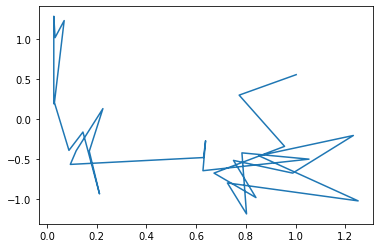

In [31]:
FirstSample=bos[1:30]['CRIM']
SecondSample=bos[1:30]['RM']

plt.plot(FirstSample,SecondSample)
plt.show()

In [32]:
from scipy.stats import spearmanr

stat,p=spearmanr(FirstSample,SecondSample)

print('stat=%.2f, p=%.30f' %(stat,p))

if p> 0.05:
    print('Accept the Null Hypotheis,Independent Samples')
else:
    print('Reject the (H0) Dependent samples')

stat=-0.46, p=0.011657704514341178658742848029
Reject the (H0) Dependent samples
